### Importing Libraries:

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords

### Importing dataset :

In [2]:
fake_news = pd.read_csv('data/Fake.csv.zip')
true_news = pd.read_csv('data/True.csv.zip')

In [3]:
fake_news.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [4]:
true_news.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


We will add a column to label Fake news as 1 and True news with a 0 to after concat both dataframes

In [5]:
fake_news['Type'] = 1 
true_news['Type'] = 0

news = pd.concat([fake_news,true_news], ignore_index= True)

In [6]:
news.to_csv('data/News.csv')

### Resulting dataframe

In [7]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Type     44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [8]:
news.head(5)

,title,text,subject,date,Type
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


### Dataset Exploration

Now that I have imported the datasets and put them together, let's start the exploration of the dataset to understand our information and how to proceed.

First, we are going to see if all the data types are correct and if there are null values

In [9]:
news.dtypes

title      object
text       object
subject    object
date       object
Type        int64
dtype: object

In [10]:
#converting the date into a datetime column

print(news.date.head(1))
print(news.date.tail(1))
news.date.sort_values(ascending=False).head(20)

0    December 31, 2017
Name: date, dtype: object
44897    August 22, 2017 
Name: date, dtype: object


21869    https://fedup.wpengine.com/wp-content/uploads/...
15839    https://fedup.wpengine.com/wp-content/uploads/...
17432    https://fedup.wpengine.com/wp-content/uploads/...
21870    https://fedup.wpengine.com/wp-content/uploads/...
15840    https://fedup.wpengine.com/wp-content/uploads/...
17433    https://fedup.wpengine.com/wp-content/uploads/...
15507    https://100percentfedup.com/video-hillary-aske...
9358     https://100percentfedup.com/served-roy-moore-v...
15508    https://100percentfedup.com/12-yr-old-black-co...
44000                                   September 9, 2017 
44017                                   September 9, 2017 
44020                                   September 9, 2017 
44042                                   September 9, 2017 
44043                                   September 9, 2017 
44019                                   September 9, 2017 
44013                                   September 9, 2017 
44016                                   September 9, 201

In [11]:
news.sort_values(by = 'date', ascending = False).head(11)

,title,text,subject,date,Type
17432,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,1
15839,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,1
21869,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,1
17433,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,1
21870,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,1
15840,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,1
15507,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,1
9358,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,1
15508,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,1
44035,Nigeria's Buhari urges calm after herdsmen kil...,ABUJA (Reuters) - Nigeria s President Muhammad...,worldnews,"September 9, 2017",0


Trying to get information from the Data with URLs instead of text.

In [12]:
#importing libraries
import requests
from bs4 import BeautifulSoup

In [13]:
urls = [row for row in news.date.sort_values(ascending = False).head(9)] 

In [14]:
#defining function to strip content from a list of elements

def strip_html(text):
    response = []
    for url in text:
        content = requests.get(url).text
        soup = BeautifulSoup(content, "html.parser")
        response.append(soup.get_text())
    return response


In [15]:
strip_html(urls)

['\n\n\nSite is not available\n\n\n\nSite is not available\n\n\n        The domain name in the URL is not associated with any active site on the WP Engine platform.\n    \n\n        If this is your site, please visit your User Portal to ensure that your\n        domain mapping and DNS records are\n        configured correctly.\n    \n\n        Still have questions? Contact Us.\n    \n\n\n        Hosted by \n\n\n',
 '\n\n\nSite is not available\n\n\n\nSite is not available\n\n\n        The domain name in the URL is not associated with any active site on the WP Engine platform.\n    \n\n        If this is your site, please visit your User Portal to ensure that your\n        domain mapping and DNS records are\n        configured correctly.\n    \n\n        Still have questions? Contact Us.\n    \n\n\n        Hosted by \n\n\n',
 '\n\n\nSite is not available\n\n\n\nSite is not available\n\n\n        The domain name in the URL is not associated with any active site on the WP Engine platform.

As it appears, we don't have access any longer to those news and urls, therefore, we will proceed to drop them from our dataset. 

In [16]:
news = news.drop((news['date'].sort_values(ascending = False).head(9)).index).copy()

In [17]:
news.date.sort_values(ascending = False).unique()[:1000]

#There are different formats in the column, so we must turn it into a cohesive format before trying to convert it.

array(['September 9, 2017 ', 'September 9, 2017', 'September 9, 2016 ',
       'September 9, 2016', 'September 8, 2017 ', 'September 8, 2017',
       'September 8, 2016 ', 'September 8, 2016', 'September 7, 2017 ',
       'September 7, 2017', 'September 7, 2016 ', 'September 7, 2016',
       'September 6, 2017 ', 'September 6, 2017', 'September 6, 2016 ',
       'September 6, 2016', 'September 5, 2017 ', 'September 5, 2017',
       'September 5, 2016 ', 'September 5, 2016', 'September 4, 2017 ',
       'September 4, 2017', 'September 4, 2016 ', 'September 4, 2016',
       'September 30, 2017 ', 'September 30, 2017', 'September 30, 2016 ',
       'September 30, 2016', 'September 3, 2017 ', 'September 3, 2017',
       'September 3, 2016 ', 'September 3, 2016', 'September 29, 2017 ',
       'September 29, 2017', 'September 29, 2016 ', 'September 29, 2016',
       'September 28, 2017 ', 'September 28, 2017', 'September 28, 2016 ',
       'September 28, 2016', 'September 27, 2017 ', 'Septem

In [18]:
#ideally, this is what we want to do. 
import datetime
datetime.datetime.strptime('Oct 9, 2017', '%b %d, %Y').strftime('%Y-%m-%d')

#since the format of the date is different, we need to format it correctly.

'2017-10-09'

In [19]:
#making sure all the months have the same format
news.date = news.date.str.replace('January','Jan').str.replace('February','Feb').str.replace('March','Mar').str.replace('April','Apr').str.replace('May','May').str.replace('June','Jun').str.replace('July','Jul').str.replace('August','Aug').str.replace('September','Sep').str.replace('October','Oct').str.replace('November','Nov').str.replace('December','Dec') 

In [20]:
#since the function is giving us an error about a 'MSNBC HOST', we select everythin but that line and make a new dataset
news = news[~news.date.str.contains('MSNBC HOST')].copy()

In [21]:
#desfining function to convert our column into a datetime format 
from datetime import datetime

ALLOWED_FORMATS = ['%Y-%m-%d', '%Y/%m/%d', '%d.%m.%Y', '%d-%m-%Y']

def convert_date(dataframe):

    for format in ALLOWED_FORMATS:
        try:
            return dataframe.apply(lambda x : datetime.strptime(x, '%b %d, %Y').strftime('%Y-%m-%d'))
        except ValueError:
            pass

In [22]:
#applying datetime function to our clean column
convert_date(news.date)

In [23]:
news.date = pd.to_datetime(news.date, infer_datetime_format=True)

Let's check out if we have converted our date column correctly. 

In [24]:
news.dtypes

title              object
text               object
subject            object
date       datetime64[ns]
Type                int64
dtype: object

Now, we convert the Type column into a boolean. 

In [25]:
news.Type.astype(bool)

0         True
1         True
2         True
3         True
4         True
         ...  
44893    False
44894    False
44895    False
44896    False
44897    False
Name: Type, Length: 44888, dtype: bool

### Checking null values

In [26]:
news.isnull().sum()

title      0
text       0
subject    0
date       0
Type       0
dtype: int64

Saving this clean dataset to a CSV file so we can start modelling and making tryouts with it

In [27]:
news.to_csv('data/News.csv')

# Visualizing our dataset and getting insights

Since the dataset is clean and has no null values, let's focus on understanding what types of news we have and the dates we are talking about.

In [28]:
news.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east', 'politicsNews', 'worldnews'], dtype=object)

Our news had a subject column attached to them, as we can see, there are 8 different types, some of them with confusing names. What makes politics and politicsNews different? and News? How does governemnt and politics differ from each other?

In [29]:
#making a copy of our dataset for our viualizing stage
news_visualize = news.copy()

#converting the datetime column into three columns to plot different variables
news_visualize['year'] = news_visualize['date'].dt.year
news_visualize['month'] = news_visualize['date'].dt.month
news_visualize['day'] = news_visualize['date'].dt.dayofyear

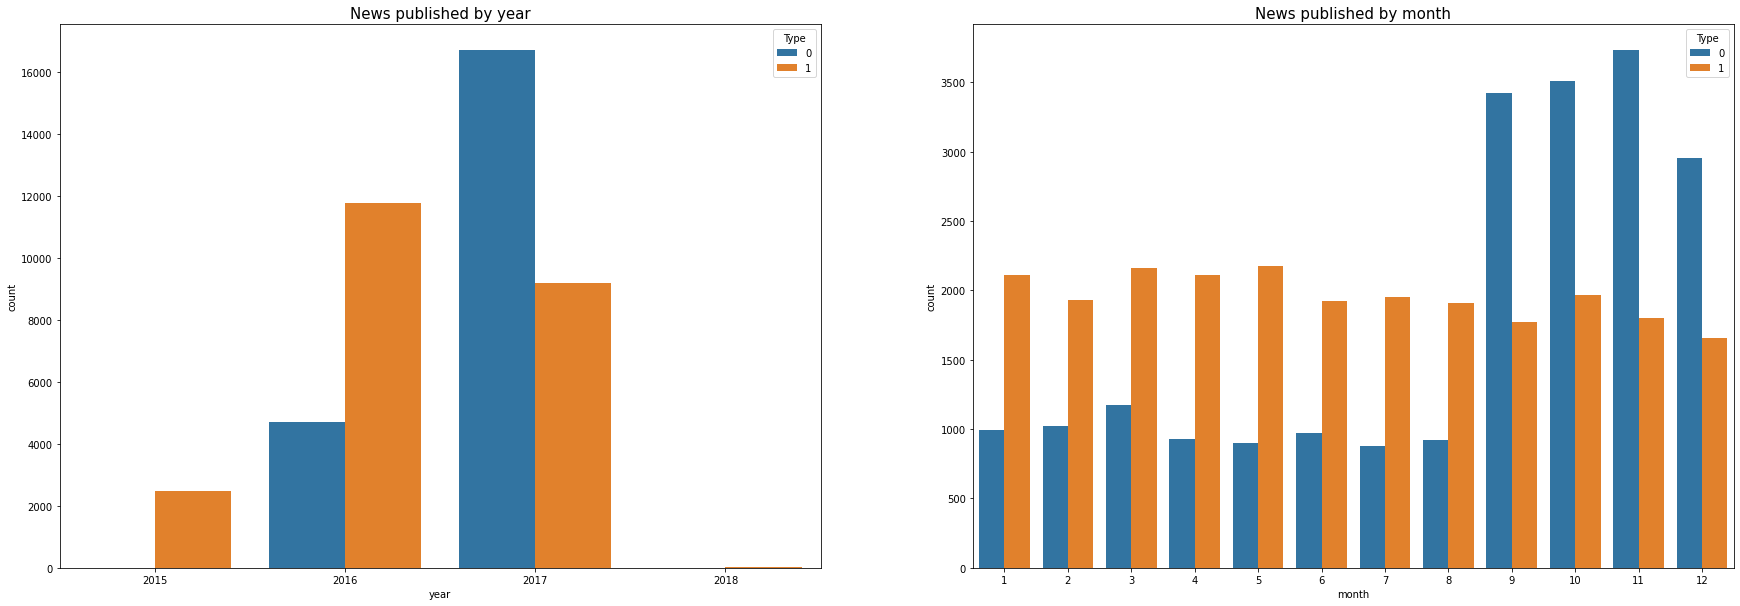

In [65]:
fig, ax =plt.subplots(1,2, figsize=(30, 10))

ax[0] = sns.countplot(news_visualize['year'], hue = 'Type', data = news_visualize, ax= ax[0])
ax[0].get_legend_handles_labels()
ax[0].tick_params(labelsize=10)
ax[0].set_title('News published by year', fontsize=15);

ax[1] = sns.countplot(news_visualize['month'], hue = 'Type', data = news_visualize, ax= ax[1])
ax[1].get_legend_handles_labels()
ax[1].tick_params(labelsize=10)
ax[1].set_title('News published by month', fontsize=15);


fig.savefig('./data/graph_dates.png', bbox_inches='tight')

We only have news which are true or false for 2016 and 2017, so we will get rid of news from 2015 and 2018 since they could make our prediction biased.

In [72]:
#dropping news from 2015 and 2018:

news['year'] = news['date'].dt.year
news.loc[(news['year'] == 2018)|(news['year'] == 2015)].year.value_counts()

news = news.drop(news.loc[(news['year'] == 2018)|(news['year'] == 2015)].index).copy()

In [74]:
#also, dropping the column year

news = news.drop(['year'], axis=1).copy()

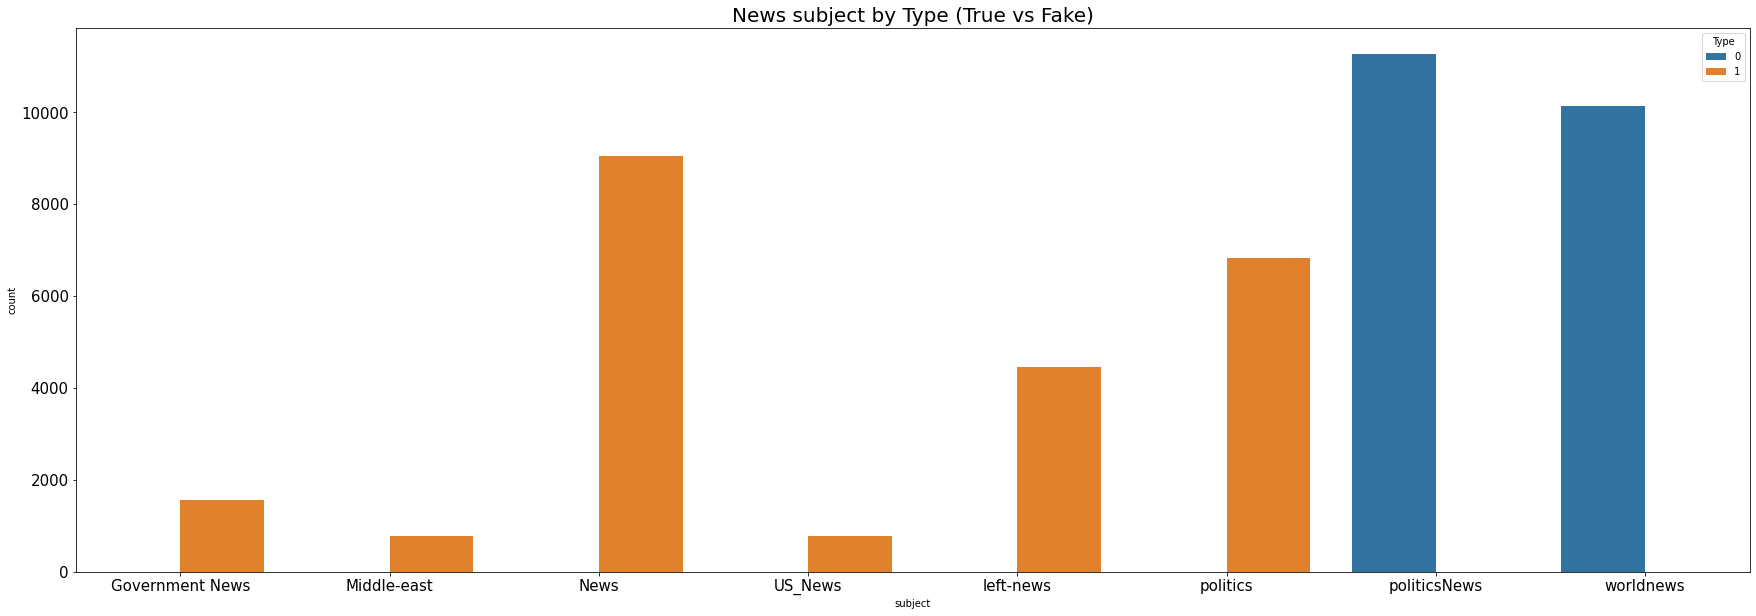

In [38]:
#plotting different news subject to understand how are they divided.

#setting figure settings 
plt.figure(figsize=(30, 10))

#declaring the plot we want to visualize 
ax = sns.countplot(news_visualize['subject'].sort_values(ascending=True), hue = 'Type', data = news_visualize)
ax.get_legend_handles_labels()
ax.tick_params(labelsize=15)
ax.set_title('News subject by Type (True vs Fake)', fontsize=20);

Apparently, our TrueNews are only politic news or world news, while our Truthful stories ahave 6 different categories, where we find, news, politics, government news, left-news, US-news and Middle East

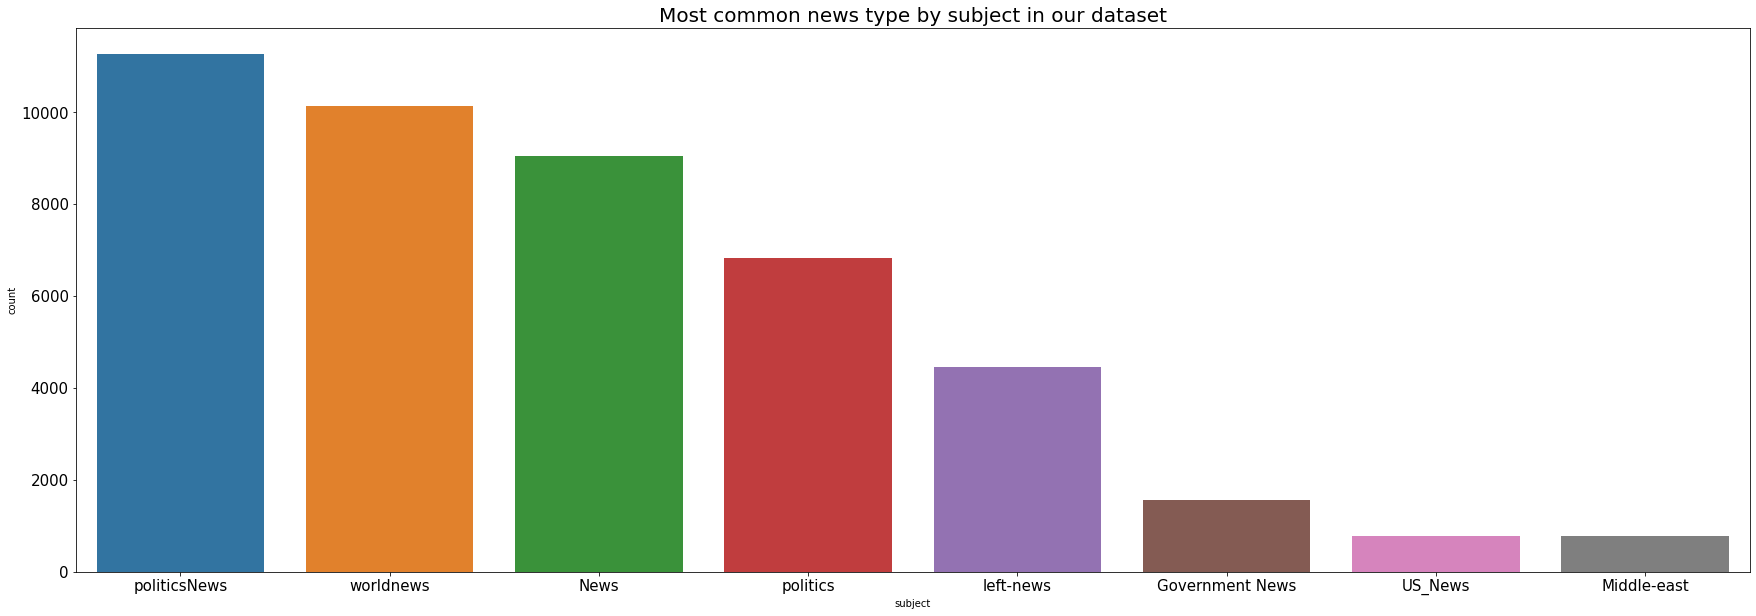

In [40]:
plt.figure(figsize=(30, 10))
ax = sns.countplot(x = 'subject', 
              data = news_visualize, 
              order = news_visualize['subject'].value_counts().index)

ax.tick_params(labelsize=15)
ax.set_title('Most common news type by subject in our dataset', fontsize=20);

In [77]:
#calculating how many fake and true news has each category
news.groupby(['Type', 'subject']).title.count()

Type  subject        
0     politicsNews       11272
      worldnews          10145
1     Government News     1568
      Middle-east          778
      News                9050
      US_News              783
      left-news           4456
      politics            6836
Name: title, dtype: int64

In [79]:
news.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6836
left-news           4456
Government News     1568
US_News              783
Middle-east          778
Name: subject, dtype: int64

Since this categorization is a little bit confusing, since all of the categories seem to be about politics, we decide to drop this column and try to classify the news using topic modeling, lda, or other. 

In [41]:
#dropping subject column
news = news.drop('subject', axis = 1).copy()

In [42]:
news.head()

,title,text,date,Type
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,2017-12-31,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,2017-12-31,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",2017-12-30,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",2017-12-29,1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,2017-12-25,1


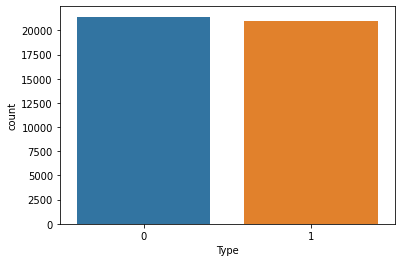

In [76]:
#checking how balanced our dataset is after all the cleaning.

sns.countplot(news['Type'])

# Defining what a Fake News is 

### 1. What does title and text look like, can we get a source, author or similar from each of them?

In [36]:
news.text.loc[news['subject']== 'worldnews'] 

'As we can see, for real news, the source is at the beginning before a dash'

'As we can see, for real news, the source is at the beginning before a dash'

In [37]:
news.text[44897]

'JAKARTA (Reuters) - Indonesia will buy 11 Sukhoi fighter jets worth $1.14 billion from Russia in exchange for cash and Indonesian commodities, two cabinet ministers said on Tuesday. The Southeast Asian country has pledged to ship up to $570 million worth of commodities in addition to cash to pay for the Suhkoi SU-35 fighter jets, which are expected to be delivered in stages starting in two years. Indonesian Trade Minister Enggartiasto Lukita said in a joint statement with Defence Minister Ryamizard Ryacudu that details of the type and volume of commodities were  still being negotiated . Previously he had said the exports could include palm oil, tea, and coffee. The deal is expected to be finalised soon between Indonesian state trading company PT Perusahaan Perdangangan Indonesia and Russian state conglomerate Rostec. Russia is currently facing a new round of U.S.-imposed trade sanctions. Meanwhile, Southeast Asia s largest economy is trying to promote its palm oil products amid threat

In [38]:
news.text.loc[news['subject']== 'left-news'] 

17461    Barbra Streisand was an Obama sycophant and on...
17462    Everyone suspected the sketchy Steele Dossier ...
17463    It s been said that good fences make good neig...
17464    The latest video from Campus Reform shows just...
17465    Friday on MSNBC, climate activist Bill Nye war...
                               ...                        
21915    Don t you just love an entitled IRS lawyer who...
21916    This is a sad commentary on a generation who h...
21917    Yeah that whole  taking up arms  thing seems t...
21918    In case you missed it Sen. Harry Reid (R-NV), ...
21919    The irony here isn t lost on us. Hillary is be...
Name: text, Length: 4456, dtype: object

In [39]:
news.text[21915]

'Don t you just love an entitled IRS lawyer who claims she can t be fired? What s even better is she was an ethics lawyer who really had no ethics at all. She was fired from the IRS but just yesterday was disbarred.A lawyer who worked in the IRS ethics office was disbarred Thursday by the District of Columbia Court of Appeals, which concluded she misappropriated a client s funds from a case she handled in private practice, broke a number of ethics rules and showed  reckless disregard for the truth  in misleading a disbarment panel looking into the matter.The lawyer, Takisha Brown, reportedly had bragged that she would never be punished because her boss would protect her, but an IRS spokesman said Wednesday that she was no longer an employee at the agency. Our records indicate that this employee no longer works for the IRS,  spokesman Matthew Leas said, though he wouldn t comment further on the case, which became another black eye for the embattled tax agency when The Washington Times f

In [40]:
'It seems we can obtain the source of the news either from the first sentence or the last'

'It seems we can obtain the source of the news either from the first sentence or the last'

In [45]:
news.loc[news['text'].str.contains('\.com')]

,title,text,subject,date,Type
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1
11,WATCH: Paul Ryan Just Told Us He Doesn’t Care...,Republicans are working overtime trying to sel...,News,2017-12-21,1
13,WATCH: Lindsey Graham Trashes Media For Portr...,The media has been talking all day about Trump...,News,2017-12-20,1
...,...,...,...,...,...
44151,U.S. airlines scramble to evacuate residents a...,(Reuters) - Airlines were racing against the c...,worldnews,2017-09-07,0
44167,Florida cites complaints over Chevron gas pric...,NEW YORK (Reuters) - Florida Attorney General ...,worldnews,2017-09-07,0
44532,South Korea's Moon faces calls to alter policy...,SEOUL (Reuters) - North Korea has been condemn...,worldnews,2017-09-04,0
44825,Samsung leader Jay Y. Lee given five-year jail...,SEOUL (Reuters) - The billionaire head of Sout...,worldnews,2017-08-24,0


### Is there any difference between the lenght of fake and real news?

In [163]:
news['lenght'] = [len(news) for news in news.text]   

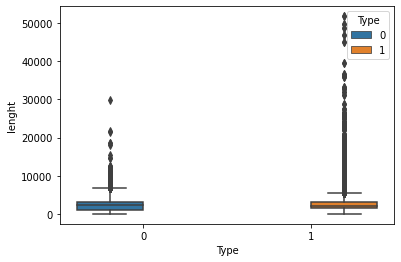

In [165]:
sns.boxplot(x="Type", 
            y="lenght",
            hue="Type",
            data=news)

It seems that fake news have more words on them. True news tend to be shorter.

In [172]:
news.groupby(['Type'])['lenght'].mean()

Type
0    2383.278517
1    2548.422777
Name: lenght, dtype: float64

In [173]:
news.groupby(['Type'])['lenght'].median()

Type
0    2222
1    2166
Name: lenght, dtype: int64

In [174]:
news.groupby(['Type'])['lenght'].min()

Type
0    1
1    1
Name: lenght, dtype: int64

In [175]:
news.groupby(['Type'])['lenght'].max()

Type
0    29781
1    51794
Name: lenght, dtype: int64

### What is the topic or most common non stop word in the news? And per subject? Does it change depending on the realness of the news?

### Are there any duplicated news in the set?

In [187]:
news['duplicate'] = news.duplicated(subset=['text'])

In [188]:
news.groupby(['duplicate', 'Type']).Type.count()

duplicate  Type
False      0       21191
           1       17449
True       0         226
           1        6022
Name: Type, dtype: int64

There are 226 real news that are duplicated and 6022 fake news that are duplicates.

In [189]:
news['duplicate'] = news.duplicated(subset=['title'])

In [190]:
news.groupby(['duplicate', 'Type']).Type.count()

duplicate  Type
False      0       20826
           1       17897
True       0         591
           1        5574
Name: Type, dtype: int64

### Is politics news and politics the same type of new? And news vs government news?

We create a word map for politics News and politics to understand if the main keywords are similar

In [128]:
#Word Cloud

text = ''
for article in news.text.values:
    text += f" {article}"
    
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/paulabarge/nltk_data'
    - '/usr/local/Cellar/jupyterlab/2.1.2/libexec/bin/../nltk_data'
    - '/usr/local/Cellar/jupyterlab/2.1.2/libexec/bin/../share/nltk_data'
    - '/usr/local/Cellar/jupyterlab/2.1.2/libexec/bin/../lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
